In [3]:
import scipy.io as sio
from netCDF4 import Dataset
import pickle
from scipy.interpolate import RegularGridInterpolator
import numpy as np
from pyproj import Proj, transform
from mpl_toolkits.basemap import Basemap

import scipy.io as sio
from netCDF4 import Dataset
import pickle

f = '36'
loc = '/Users/mdattler/Desktop/Large_Data_Files/All_AMSR_Data/AMSR_DATA_PICKLE/'

tb18_2015 = pickle.load(open(loc+'2015'+'_amsr_data'+f+'.p', "rb" ))
tb18_2016 = pickle.load(open(loc+'2016'+'_amsr_data'+f+'.p', "rb" ))
tb18_2017 = pickle.load(open(loc+'2017'+'_amsr_data'+f+'.p', "rb" ))
tb18_2018 = pickle.load(open(loc+'2018'+'_amsr_data'+f+'.p', "rb" ))
coordinates=pickle.load(open(loc+'geolocations.p', "rb" ))
# Translating Firn Data to SOUTHERN EASE-2 GRID/AMSR

latandlon = sio.loadmat('/Users/mdattler/Desktop/Large_Data_Files/FirnData/latandlon.mat')


firndata = Dataset('/Users/mdattler/Desktop/Large_Data_Files/FirnData/GSFC_FDM_rho_temp_2017.nc')


inProj = Proj(init='epsg:4326') 
outProj = Proj(init='epsg:3412')

x_amsr,y_amsr = transform(inProj,outProj,latandlon['lon'],latandlon['lat'])


# AMERY SUPRAGLACIAL LAKE LOCATION

lat = -66.1565
lon = -62.0885

# x_amsr,y_amsr = transform(inProj,outProj,-170,-81)

x_lake,y_lake = transform(inProj,outProj,lon,lat)

yind=np.argmin(np.abs(coordinates['X12'][0,:]-x_lake))
xind=np.argmin(np.abs(coordinates['Y12'][:,0]-y_lake))


from scipy.interpolate import griddata
import matplotlib.pyplot as plt 

DATE=25


xmin=2
xmax=2

ymin=2
ymax=2



In [98]:
freq='36'
new_x = coordinates['X12'][xind-xmin:xind+xmax,yind-ymin:yind+ymax]
new_y = coordinates['Y12'][xind-xmin:xind+xmax,yind-ymin:yind+ymax]
new_z_2015 = tb18_2015['TB_'+freq+'H'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,:]
new_z_2016 = tb18_2016['TB_'+freq+'H'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,:]
new_z_2017 = tb18_2017['TB_'+freq+'H'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,:]
new_z_2018 = tb18_2018['TB_'+freq+'H'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,:]


new_z=np.concatenate((new_z_2015,new_z_2016,new_z_2017,new_z_2018),axis=2)


new_z_t = new_z[1,1,:]
tb_vals = new_z_t[365+366:365+366+365]

print(new_x[0,1])
print(new_y[0,1])

-2331249.846672749
1256249.7687686393


In [2]:
import matplotlib.pyplot as plt 
plt.pcolor(new_x,new_y,new_z[:,:,0])

NameError: name 'new_x' is not defined

In [9]:
point1 = sio.loadmat('/Users/mdattler/Desktop/Large_Data_Files/FirnData/Point_1.mat')
from scipy import interpolate
times = (firndata['time'][:]-2017.)*365.


depths = firndata['depth'][::7]
temps = np.zeros((365,len(depths)))*np.nan
densities = np.zeros((365,len(depths)))*np.nan
grains = np.zeros((365,len(depths)))*np.nan
for ind,depth in enumerate(depths):
    ftemp = interpolate.interp1d(times, firndata['temperature'][:,ind*7,15])
    fdens = interpolate.interp1d(times, firndata['density'][:,ind*7,15])
    fgrain = interpolate.interp1d(times, point1['grainS'][ind*7,:])
    temps[3:363,ind]=ftemp(np.arange(3,363))
    densities[3:363,ind]=fdens(np.arange(3,363))
    grains[3:363,ind]=fgrain(np.arange(3,363))
    
    

In [27]:
np.sqrt(grains[day,:])*adj*1e6

array([ 461.9999986 ,  466.24836465,  472.0857442 ,  484.01989856,
        513.87779331,  560.88884864,  563.38007189,  569.12473876,
        572.14881445,  575.54277282,  580.33372024,  581.37052025,
        589.01123767,  595.71522941,  596.77514894,  598.95084728,
        602.4248704 ,  612.34410675,  623.6118177 ,  634.22037701,
        666.89009308,  810.7405875 ,  841.40412177,  877.46516169,
        886.8633529 ,  902.22951419,  904.59622471,  907.68448596,
        939.50683931,  951.22564554,  964.72934645, 1034.24272572,
       1057.83414507, 1064.14139931, 1071.38387485, 1094.0625088 ,
       1093.93940411, 1092.98932773, 1091.1409555 , 1099.17067923,
       1123.63830844, 1141.29644217, 1188.89989793, 1204.20249378,
       1234.11593808, 1293.02582371, 1343.8007597 , 1368.88948718,
       1469.32672569, 1477.5721019 , 1569.45114513])

4.62

In [115]:
# from smrt import make_snowpack, make_model, sensor_list, water_parameters, make_ice_column


def grab_thicknesses(xvalue):
    in_between = (xvalue[1:] + xvalue[:-1]) / 2
    seperators = np.append(arr = np.array([0.]), values = np.squeeze(in_between), axis= 0)
    full_seperators = np.append(arr = seperators, values = seperators[-5]+100.)
    thicknesses = np.diff(full_seperators)
    return thicknesses

vertical_skip = 7
thicknesses=grab_thicknesses(firndata['depth'][::vertical_skip])


days = np.arange(4,363)
# days = [150]
adj=5.5
uncert=0.

TB_under = np.arange(0,365)*np.nan
TB_middle = np.arange(0,365)*np.nan
TB_over = np.arange(0,365)*np.nan


for day in days:
    if np.isnan(temps[day,0]):
        continue


    density = densities[day,:]
    temp = temps[day,:]


#     snowpack_under = make_snowpack(thicknesses,  "sticky_hard_spheres",density = density, temperature = temp,
#                                          radius = np.sqrt(grains[day,:])*adj-uncert, stickiness=0.5,) 
#     snowpack_middle = make_snowpack(thicknesses,  "sticky_hard_spheres",density = density, temperature = temp,
#                                          radius = np.sqrt(grains[day,:])*adj, stickiness=0.5,) 
    snowpack_over = make_snowpack(thicknesses,  "sticky_hard_spheres",density = density, temperature = temp,
                                         radius = np.sqrt(grains[day,:])*adj, stickiness=8,) 

    m = make_model('dmrt_qcacp_shortrange', "dort")

    sensorH = sensor_list.amsre('36H')
#     resH_under = m.run(sensorH, snowpack_under)
    resH_over = m.run(sensorH, snowpack_over)
#     resH_middle = m.run(sensorH, snowpack_middle)

#     TB_under[day] = resH_under.TbH()
#     TB_middle[day] = resH_middle.TbH()
    TB_over[day] = resH_over.TbH()


    print(TB_under[day])
    print(TB_middle[day])
    print(TB_over[day])
    


nan
nan
215.29388961642886
nan
nan
215.13346618115207
nan
nan
214.8614717257428
nan
nan
211.87102599799363
nan
nan
212.2824686051181
nan
nan
213.64434520646546
nan
nan
219.07578568673856
nan
nan
219.2163716984223
nan
nan
219.40566197208406
nan
nan
219.28903464471935
nan
nan
219.0262395818815
nan
nan
216.6231543213318
nan
nan
216.1670909330531
nan
nan
215.75352787384438
nan
nan
215.50774834410637
nan
nan
215.55959245292243
nan
nan
215.88260555722223
nan
nan
216.0590777610935
nan
nan
216.07871510110536
nan
nan
215.9568595336821
nan
nan
215.68039737970778
nan
nan
215.1223431827096
nan
nan
214.44567747736176
nan
nan
213.6511920057795
nan
nan
212.366802127552
nan
nan
213.3578184922381
nan
nan
216.1019888630524
nan
nan
212.324273223859
nan
nan
211.36896971644117
nan
nan
210.27262209256926
nan
nan
208.5062044441663
nan
nan
208.47107464780115
nan
nan
208.39739654800613
nan
nan
208.29860143570676
nan
nan
206.94428510694382
nan
nan
204.84598477193603
nan
nan
201.58738511919896
nan
nan
198.252322

nan
nan
192.2527939247205
nan
nan
193.57594806145138
nan
nan
194.61677836941848
nan
nan
195.57944566356335
nan
nan
196.52554185511505
nan
nan
197.40665934375494
nan
nan
198.43603897212768
nan
nan
199.52570756101133
nan
nan
200.34454201886052
nan
nan
200.8902312003999
nan
nan
200.37251346217423
nan
nan
200.2998638302036
nan
nan
200.8381094206821
nan
nan
200.7258008942122
nan
nan
200.85624635988407
nan
nan
201.60932886178855
nan
nan
200.9557888789871
nan
nan
200.69539543297392
nan
nan
200.2340675253711
nan
nan
199.70429384232457
nan
nan
198.9405589324166
nan
nan
199.68383460319524
nan
nan
201.59547259974443
nan
nan
203.28109379456035
nan
nan
204.90114274548182
nan
nan
206.49878178358762
nan
nan
207.87894039664147
nan
nan
208.2635929802664
nan
nan
208.65525743517156
nan
nan
208.733296041161
nan
nan
209.28005117546758
nan
nan
209.69289568561712
nan
nan
210.57250529113097
nan
nan
210.94252833593853
nan
nan
211.6436752087164
nan
nan
212.33571160091375
nan
nan
212.8147909538779
nan
nan
213.05

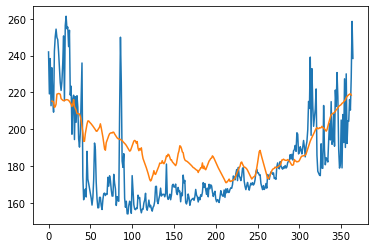

In [117]:
plt.plot(tb_vals,'-')
# plt.plot(TB_under,'.')
plt.plot(TB_over,'-')

In [22]:
TB_under

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      